In [67]:
# By Saransh Rajpurohit

In [68]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
# Creating a dataframe

In [70]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} :  {df[column].unique()}')

In [71]:
# Getting unique values

In [72]:
print_unique_values(df)

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :  ['No' 'Yes']


In [73]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [74]:
df1 = df.drop('customerID' , axis='columns')
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
# As customerID cannot be converted into a numeral and are much more than required for prediction

In [76]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
df1.shape

(7043, 20)

In [78]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'] , errors='coerce')

In [79]:
# Converting TotalCharges into numerals

In [80]:
df1[pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()].shape

(11, 20)

In [81]:
# Shape of dataframe in where total charges were null or blank

In [82]:
df2 = df1[~df1['TotalCharges'].isnull()]
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
# Removing samples where TotalCharges is equal to null 

## **Exploratory Data Analysis**

In [84]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


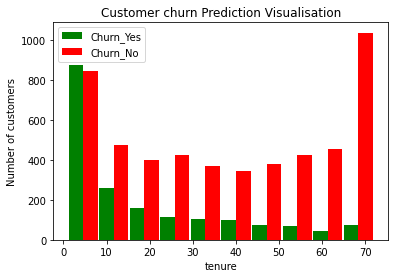

In [85]:
tenure_churn_no = df2[df2.Churn == 'No'].tenure
tenure_churn_yes = df2[df2.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([tenure_churn_yes , tenure_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

In [86]:
# As tenure increases chances of churn decreses significantly

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


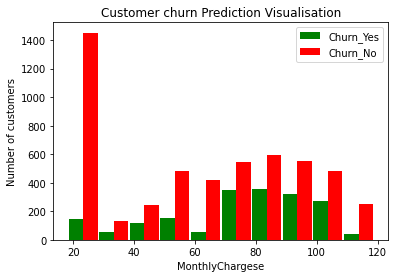

In [87]:
mc_churn_no = df2[df2.Churn == 'No'].MonthlyCharges
mc_churn_yes = df2[df2.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyChargese')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([mc_churn_yes , mc_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

In [88]:
# As monthly charges increases chances of churning increases significantly

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


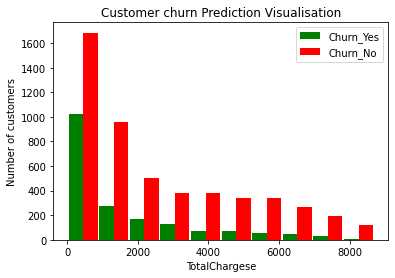

In [89]:
tc_churn_no = df2[df2.Churn == 'No'].TotalCharges
tc_churn_yes = df2[df2.Churn == 'Yes'].TotalCharges

plt.xlabel('TotalChargese')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([tc_churn_yes , tc_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

In [90]:
# As total charges increases chances of churning increases significantly

In [91]:
df2 = df2.replace('No phone service' , 'No')
df2 = df2.replace('No internet service' , 'No')

In [92]:
# Converting No phone service and No internet service into No

In [93]:
print_unique_values(df2)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [94]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' ,
                 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' ,'Churn']

for col in yes_no_columns:
  df2[col].replace({'Yes' :1 , 'No':0} , inplace=True)

In [95]:
# Converting yes into 1 and no into 0

In [96]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [97]:
for col in df2:
  print(col , ':' , df2[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [98]:
df2['gender'].replace({'Female':1 ,  'Male':0} , inplace=True)

In [99]:
# Converting Female to 1 and Male to 0

In [100]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [101]:
df3 = pd.get_dummies(data = df2 , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [102]:
# Replacing InternetService , Contract and PaymentMethod with their dummies

In [103]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [104]:
for col in df3:
  print(col , ':' , df3[col].unique())

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [105]:
X = df3.drop('Churn' , axis='columns')
Y = df3['Churn']

In [106]:
# Seperating X and Y into features and labels

In [107]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

In [108]:
# Splitting into test and train dataframes

# **Logistic Regression Model**

In [109]:
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

lmodel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [110]:
print('Training Accuarcy',lmodel.score(xtrain,ytrain))
print('Testing Accuarcy',lmodel.score(xtest,ytest))

Training Accuarcy 0.7988244216913158
Testing Accuarcy 0.8111490329920364


In [111]:
# Training Accuarcy is 0.7988244216913158 and Testing Accuracy is  0.8111490329920364

Text(69.0, 0.5, 'Truth')

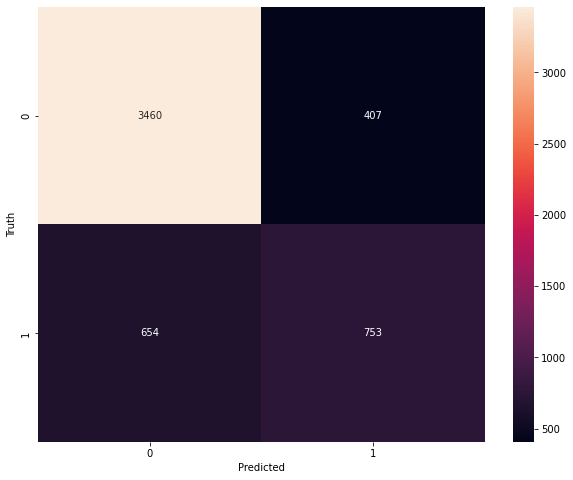

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , lmodel.predict(xtrain))
cm_test = confusion_matrix(ytest , lmodel.predict(xtest))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [113]:
# Creating Confusion Matrix

Text(69.0, 0.5, 'Truth')

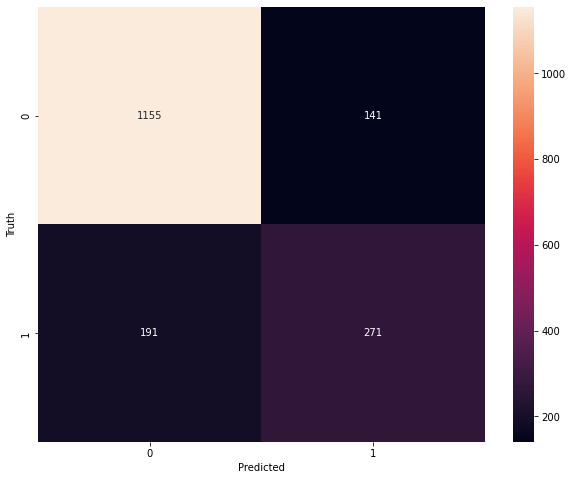

In [114]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
# TNR = 1155/(1155+141) = 0.8912037037

In [116]:
# TPR = 271/(271+191) = 0.5865800866

In [117]:
ytrain_pred_prob = lmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = lmodel.predict_proba(xtest)[:,1]

In [118]:
from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8450103283133632
0.8495111498583722


In [119]:
# auc for train is 0.8450103283133632 and for test is 0.8495111498583722

In [120]:
fpr,tpr,thresh = roc_curve(ytrain,ytrain_pred_prob)

In [121]:
import numpy as np

g_val = tpr * (1-fpr)
idx = np.argmax(g_val)
print(idx)

933


In [122]:
# Calculating g_val

In [123]:
thresh[idx]

0.2903927389191748

In [124]:
print(fpr[idx] , tpr[idx])

0.2443754848719938 0.7853589196872779


In [125]:
# Reducing biasing towards 0

In [200]:
train_prediction = np.where(lmodel.predict_proba(xtrain)[:,1] >= 0.2903927389191748 , 1 , 0)
test_prediction = np.where(lmodel.predict_proba(xtest)[:,1] >= 0.2903927389191748 , 1 , 0)

In [201]:
(ytrain == train_prediction).sum() / len(xtrain)

0.686196435343193

In [202]:
(ytest == test_prediction).sum() / len(xtest)

0.679749715585893

Text(69.0, 0.5, 'Truth')

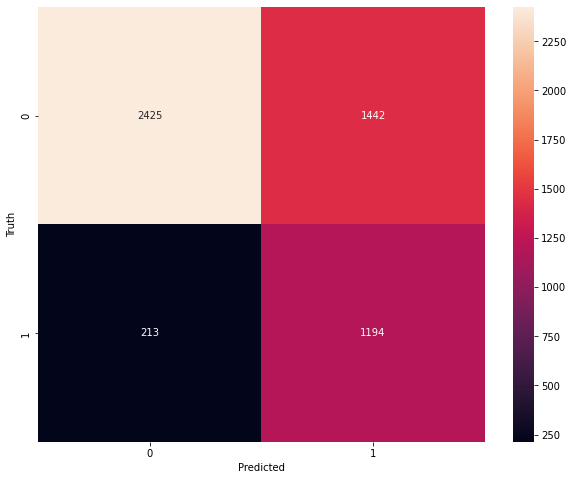

In [203]:
cm_train = confusion_matrix(ytrain , train_prediction)
cm_test = confusion_matrix(ytest , test_prediction)

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [204]:
# Creating confusion matrix

Text(69.0, 0.5, 'Truth')

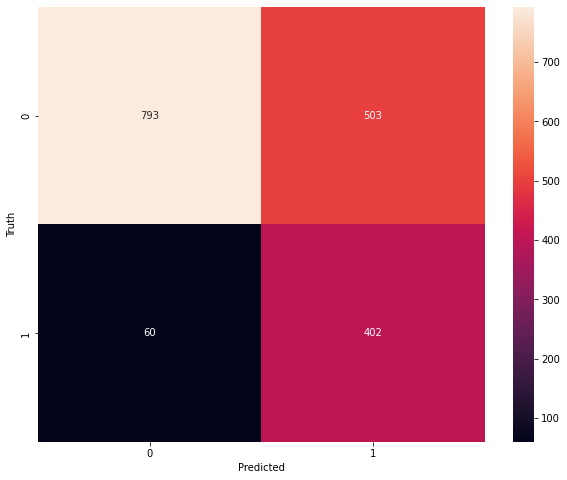

In [205]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [206]:
# TNR = 793/(793+503) = 0.611882716

In [207]:
# TPR = 402/(402+60) = 0.8701298701

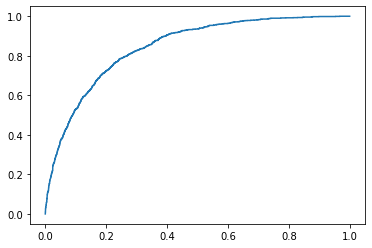

In [208]:
plt.plot(fpr, tpr)
plt.show()



*   Model is 80% accurate but more biased towards category 0 in case default threshold value is 0.5 to make decision about 0 or 1. Individual accuracy for category 0 is close to 89% and for category 1 it is close to 58%
*   Model is approx 68% accurate if the decision making threshold came down to 0.29 and individual accuracy for category 0 is close to 61% and for category 1 is close to 87%  i.e. accuracy for category 0 decreases but for category 1 incresed and model is no more biased towards a particular category



# **Support Vector Machine Model**

In [135]:
from sklearn.svm import SVC
smodel = SVC(probability=True)

smodel.fit(xtrain,ytrain)

SVC(probability=True)

In [136]:
print(smodel.score(xtrain,ytrain))
print(smodel.score(xtest,ytest))

0.7332195676905574
0.7372013651877133


In [137]:
# Train accuracy is 0.7303754266211604 and Test accuracy is 0.7457337883959044

In [138]:
ytrain_pred_prob = smodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = smodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.7898872404389815
0.8080315389343167


In [139]:
# Test auc is 0.7745287252758879 and Train auc is 0.7978518292139688

In [140]:
fpr_s,tpr_s,thresh_s = roc_curve(ytrain,ytrain_pred_prob)

In [141]:
# Plotting roc curve

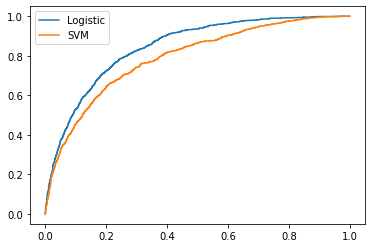

In [142]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.legend()

plt.show()

# **Random Forest Model**

In [143]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=6)

rmodel.fit(xtrain,ytrain)

print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

0.8132347364429275
0.8145620022753128


In [144]:
# Train accuracy is 0.8132347364429275 and Test accuracy is 0.8145620022753128

In [145]:
ytrain_pred_prob = rmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = rmodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8703174070171512
0.8522810779755224


In [146]:
# Train auc is 0.8703174070171512 and Test auc is 0.8522810779755224

In [147]:
fpr_r,tpr_r,thresh_r = roc_curve(ytrain,ytrain_pred_prob)

Text(69.0, 0.5, 'Truth')

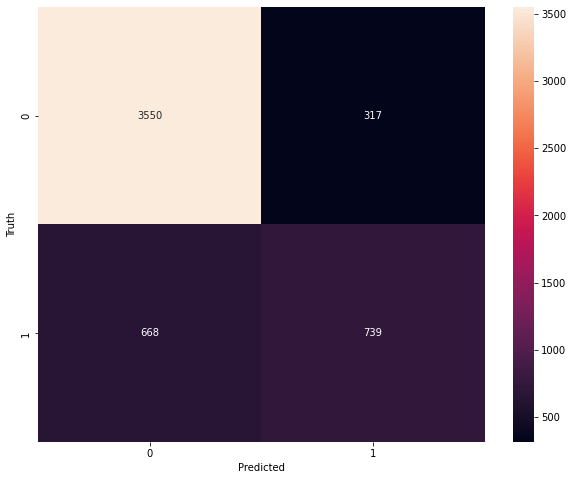

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , rmodel.predict(xtrain))
cm_test = confusion_matrix(ytest , rmodel.predict(xtest))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [149]:
# Creating confusion matrix

Text(69.0, 0.5, 'Truth')

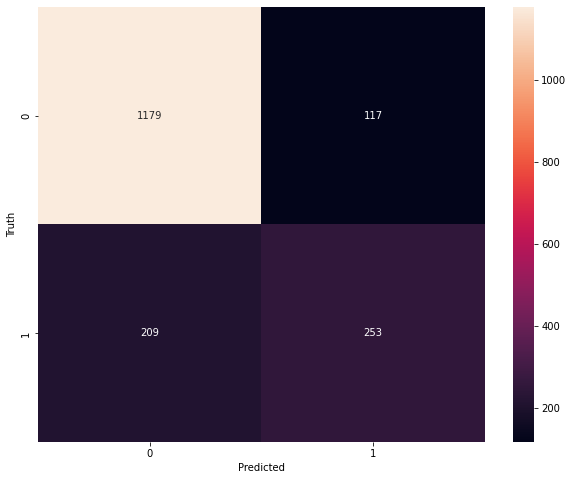

In [150]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [151]:
# TNR = 1179/(1179+117) = 0.9097222222

In [152]:
# TPR = 253/(253+209) = 0.5476190476

In [153]:
import numpy as np

g_val = tpr_r * (1-fpr_r)
idx = np.argmax(g_val)
print(idx)

878


In [154]:
thresh_r[idx]

0.329195774324782

In [155]:
print(fpr_r[idx] , tpr_r[idx])

0.2182570468063098 0.7896233120113717


In [156]:
# Reducing biasing towards zero

In [157]:
train_prediction = np.where(rmodel.predict_proba(xtrain)[:,1] >= 0.2693123755149946 , 1 , 0)
test_prediction = np.where(rmodel.predict_proba(xtest)[:,1] >= 0.2693123755149946 , 1 , 0)

In [158]:
(ytrain == train_prediction).sum() / len(xtrain)

0.7504740235115662

In [159]:
(ytest == test_prediction).sum() / len(xtest)

0.7320819112627986

Text(69.0, 0.5, 'Truth')

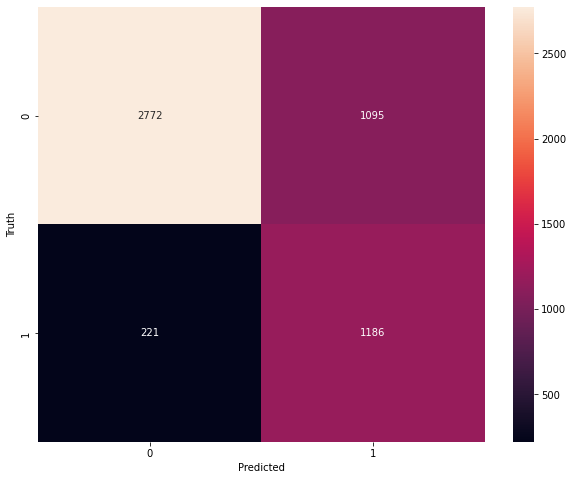

In [160]:
cm_train = confusion_matrix(ytrain , train_prediction)
cm_test = confusion_matrix(ytest , test_prediction)

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [161]:
# Creating confusion matrix

Text(69.0, 0.5, 'Truth')

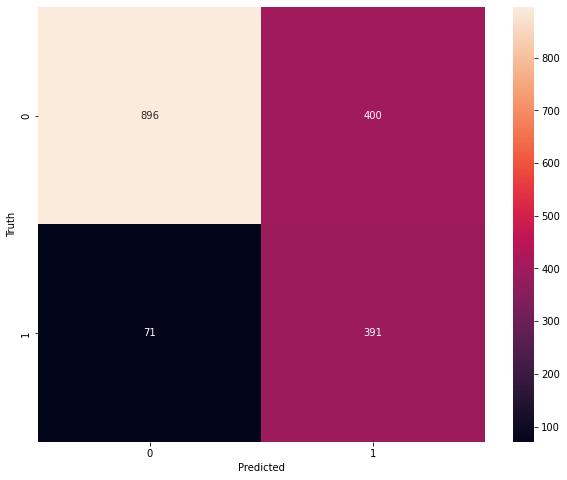

In [162]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [163]:
# TNR = 896/(896+400) = 0.6913580247

In [164]:
# TPR = 391/(391+71) = 0.8463203463



*   Model is 81% accurate but more biased towards category 0 in case default threshold value is 0.5 to make decision about 0 or 1. Individual accuracy for category 0 is close to 90% and for category 1 it is close to 54%
*   Model is approx 74% accurate if the decision making threshold came down to 0.32 and individual accuracy for category 0 is close to 69% and for category 1 is close to 84% i.e. accuracy for category 0 decreases but for category 1 incresed and model is no more biased towards a particular category



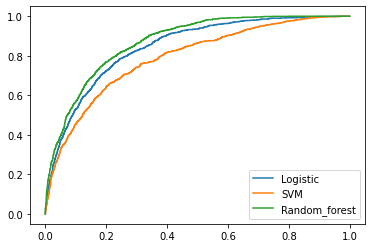

In [165]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.plot(fpr_r , tpr_r , label = 'Random_forest')

plt.legend()

plt.show()

# **Neural Network Model**

In [166]:
col_scale = ['tenure' , 'MonthlyCharges' ,	'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xtrain[col_scale] = scaler.fit_transform(xtrain[col_scale])
xtest[col_scale] = scaler.fit_transform(xtest[col_scale])

In [167]:
# Scaling tenure , MonthlyCharges and	TotalCharges into range 0 to 1

In [168]:
from keras import models
from keras import layers

model = models.Sequential()                                                                #Creating sequential neural network model
model.add(layers.Dense(16 , activation = 'relu' , input_dim = xtrain.shape[1]))            #adding hidden layers into it
model.add(layers.Dense(1 , activation = 'sigmoid'))                                        #1 neurons at output layer as target variable is having 1 value

In [169]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                432       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [170]:
from keras import optimizers
from keras import metrics

model.compile(optimizer = 'sgd',
              loss = 'binary_crossentropy' ,      # As target is binary
              metrics = ['accuracy'])

In [171]:
model.fit(xtrain,ytrain,epochs=30)

Epoch 1/30
165/165 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.7283
Epoch 2/30
165/165 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7359
Epoch 3/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7531
Epoch 4/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7664
Epoch 5/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7713
Epoch 6/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7749
Epoch 7/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7763
Epoch 8/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7791
Epoch 9/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7802
Epoch 10/30
165/165 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7806

In [172]:
model.evaluate(xtest,ytest)

55/55 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8100


[0.4146646559238434, 0.8100113868713379]

In [173]:
# Test Accuracy is 0.8100

In [174]:
model.predict(xtrain)

array([[0.5784188 ],
       [0.43634918],
       [0.29801553],
       ...,
       [0.0160256 ],
       [0.23069453],
       [0.0936183 ]], dtype=float32)

Text(69.0, 0.5, 'Truth')

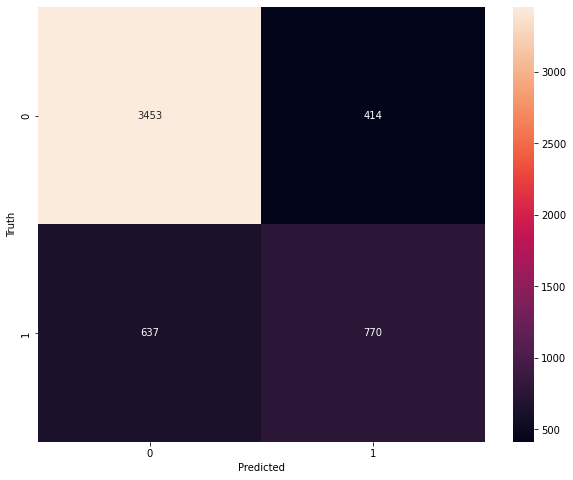

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , np.round(model.predict(xtrain)))
cm_test = confusion_matrix(ytest , np.round(model.predict(xtest)))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [176]:
# Creating confusion matrix

Text(69.0, 0.5, 'Truth')

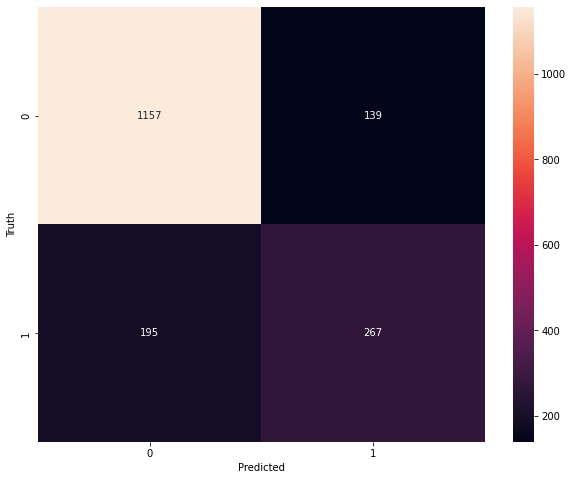

In [177]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [178]:
# TNR = 1157/(1157+139) = 0.892769136

In [179]:
# TPR = 267/(267+195) = 0.5779220779

In [180]:
ytrain_pred_prob = model.predict(xtrain)
ytest_pred_prob = model.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8421633566255684
0.8465967545828657


In [181]:
# Train auc is 0.8421633566255684 and Test is 0.8465967545828657

In [182]:
fpr_m,tpr_m,thresh_m = roc_curve(ytrain,ytrain_pred_prob)

In [183]:
g_val = tpr_m * (1-fpr_m)
np.argmax(g_val)

941

In [196]:
thresh[941]

0.28145568930702125

In [185]:
# Reducing biasing towards zero

In [197]:
train_prediction = np.where(model.predict(xtrain) >= 0.28145568930702125 , 1 , 0)
test_prediction = np.where(model.predict(xtest) >= 0.28145568930702125 , 1 , 0)

In [198]:
(ytrain == train_prediction.ravel()).sum() / len(xtrain)

0.7485779294653014

In [199]:
(ytest == test_prediction.ravel()).sum() / len(xtest)

0.7485779294653014

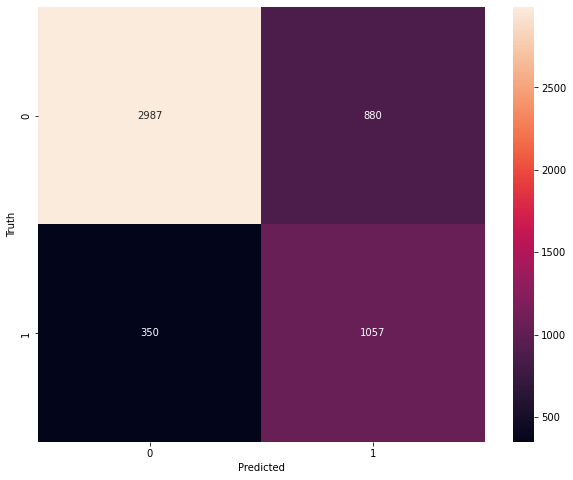

In [189]:
cm_train = confusion_matrix(ytrain , train_prediction.ravel())
cm_test = confusion_matrix(ytest , test_prediction.ravel())

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [190]:
# Creating confusion matrix

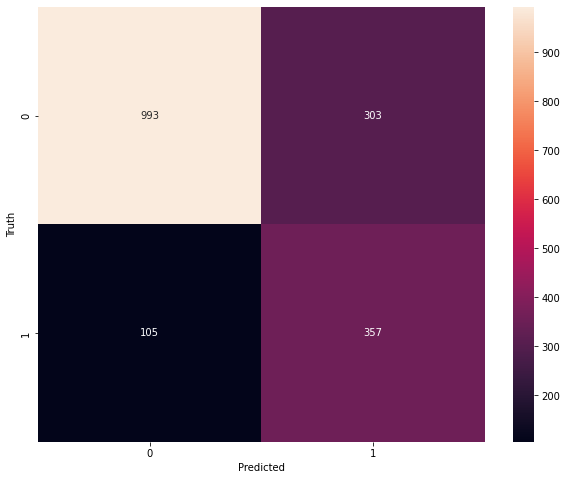

In [191]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [192]:
# TNR = 993/(993+303) = 0.7662037037

In [193]:
# TPR = 357/(357+105) = 0.7727272727



*   Model is 81% accurate but more biased towards category 0 in case default threshold value is 0.5 to make decision about 0 or 1. Individual accuracy for category 0 is close to 89% and for category 1 it is close to 57%
*   Model is approx 74% accurate if the decision making threshold came down to 0.28 and individual accuracy for category 0 is close to 76% and for category 1 is close to 77% i.e. accuracy for category 0 decreases but for category 1 incresed and model is no more biased towards a particular category



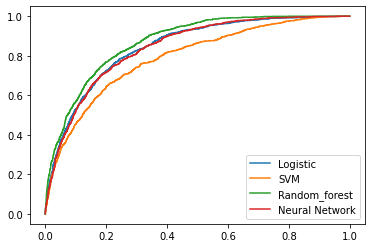

In [194]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.plot(fpr_r , tpr_r , label = 'Random_forest')

plt.plot(fpr_m , tpr_m , label = 'Neural Network')

plt.legend()

plt.show()

In [195]:
# Random Forest is the best model